# **DESAFIO 02 - APRENDIZAGEM SUPERVISIONADA: REGRESSÃO DO DATASET DADOS PESSOAIS DE CUSTOS MÉDICOS DO REPOSITORIO KAGGLE**

Neste projeto, o objetivo é desenvolver e selecionar o melhor algoritmo de Machine Learning de regressão para prever o custo do seguro de saúde com base nos atributos do conjunto de dados disponível no seguinte link:

https://www.kaggle.com/datasets/mirichoi0218/insurance/code

Os algoritmos de regressão que serão avaliados são:

    Regressão Linear Simples
    Regressão Linear Múltipla
    Regressão Polinomial
    Regressão por Vetores de Suporte (SVR)
    Regressão com Árvore de Decisão
    Regressão com Random Forest
    Regressão com XGBoost
    Regressão com Light GBM
    Regressão com CatBoost

Utilizaremos as métricas padrão para avaliação de modelos de regressão, tais como o Erro Quadrático Médio (Mean Squared Error - MSE), o Erro Absoluto Médio (Mean Absolute Error - MAE) e o Coeficiente de Determinação (R²). O modelo que apresentar o melhor desempenho nessas métricas será selecionado como o mais adequado para prever o custo do seguro com base nos atributos fornecidos.

## **CONHECENDO O DATASET**

In [154]:
import numpy as np
import pandas as pd

In [155]:
df = pd.read_csv('../dataset/insurance.csv',
                    sep=',', encoding='iso-8859-1')

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### **LEGENDA**

**Atributos previsores**

**- age**: idade do beneficiário principal.

**- sex**: gênero do contratante de seguros (feminino, masculino).

**- bmi**: índice de massa corporal, que fornece uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m^2) usando a relação entre altura e peso, idealmente 18,5 a 24,9.

**- children**: número de filhos cobertos pelo seguro saúde / número de dependentes.

**- smoker**: indica se o beneficiário é fumante.

**- region**: área residencial do beneficiário nos EUA (nordeste, sudeste, sudoeste, noroeste).

**Variável alvo**

**- charges**: custos médicos individuais cobrados pelo seguro de saúde.

In [4]:
df.shape

(1338, 7)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

### **Valores Missing (NAN)**

In [5]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Análise dos tipos de atributos.**

In [6]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### **Tratamento dos tipos de atributos.**

### **LabelEncoder: transformação de variáveis categóricas em numéricas**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [9]:
df.shape

(1338, 7)

In [10]:
previsores_labelencoder = df.iloc[:, 0:6].values
previsores_labelencoder

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [11]:
previsores_labelencoder.shape

(1338, 6)

In [12]:
previsores_labelencoder_ordinal = df.iloc[:, 0:6].values

In [13]:
previsores_labelencoder_ordinal[:,1] = LabelEncoder().fit_transform(previsores_labelencoder_ordinal[:,1])
previsores_labelencoder_ordinal[:,4] = LabelEncoder().fit_transform(previsores_labelencoder_ordinal[:,4])
previsores_labelencoder_ordinal[:,5] = LabelEncoder().fit_transform(previsores_labelencoder_ordinal[:,5])

In [14]:
previsores_labelencoder_ordinal

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

In [15]:
previsores_labelencoder.shape

(1338, 6)

In [16]:
alvo_labelencoder = df.iloc[:, 6:7].values
alvo_labelencoder

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [17]:
df_ordinal = df.copy()

In [18]:
df_ordinal['sex'] = previsores_labelencoder_ordinal[:,1].astype(int)
df_ordinal['smoker'] = previsores_labelencoder_ordinal[:,4].astype(int)
df_ordinal['region'] = previsores_labelencoder_ordinal[:,5].astype(int)

In [19]:
df_ordinal.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

### **Escalonamento**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
previsores_labelencoder_ordinal_esc = StandardScaler().fit_transform(previsores_labelencoder_ordinal)
previsores_labelencoder_ordinal_esc

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [22]:
alvo_labelencoder_esc = StandardScaler().fit_transform(alvo_labelencoder)
alvo_labelencoder_esc

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

### **OneHotEncoder: Criação de variáveis Dummy (fictícia).**

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
previsores_labelencoder_ordinal_onehot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,4,5])],
                                remainder='passthrough').fit_transform(previsores_labelencoder_ordinal)
previsores_labelencoder_ordinal_onehot

array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
       [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
       [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [1.0, 0.0, 1.0, ..., 21, 25.8, 0],
       [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object)

In [25]:
previsores_labelencoder_ordinal_onehot.shape

(1338, 11)

### **Escalonamento**

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
previsores_labelencoder_ordinal_onehot_esc = StandardScaler().fit_transform(previsores_labelencoder_ordinal_onehot)
previsores_labelencoder_ordinal_onehot_esc

array([[ 1.0105187 , -1.0105187 , -1.97058663, ..., -1.43876426,
        -0.45332   , -0.90861367],
       [-0.98959079,  0.98959079,  0.5074631 , ..., -1.50996545,
         0.5096211 , -0.07876719],
       [-0.98959079,  0.98959079,  0.5074631 , ..., -0.79795355,
         0.38330685,  1.58092576],
       ...,
       [ 1.0105187 , -1.0105187 ,  0.5074631 , ..., -1.50996545,
         1.0148781 , -0.90861367],
       [ 1.0105187 , -1.0105187 ,  0.5074631 , ..., -1.29636188,
        -0.79781341, -0.90861367],
       [ 1.0105187 , -1.0105187 , -1.97058663, ...,  1.55168573,
        -0.26138796, -0.90861367]])

**Dados Estatísticos**

In [28]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

**Análise dos outliers**

In [29]:
import plotly.express as px

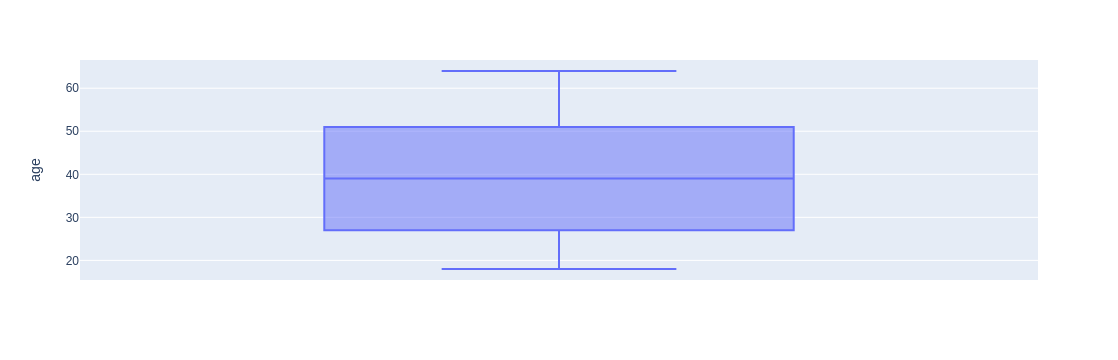

In [30]:
boxplot = px.box(df, y="age")
boxplot.show()

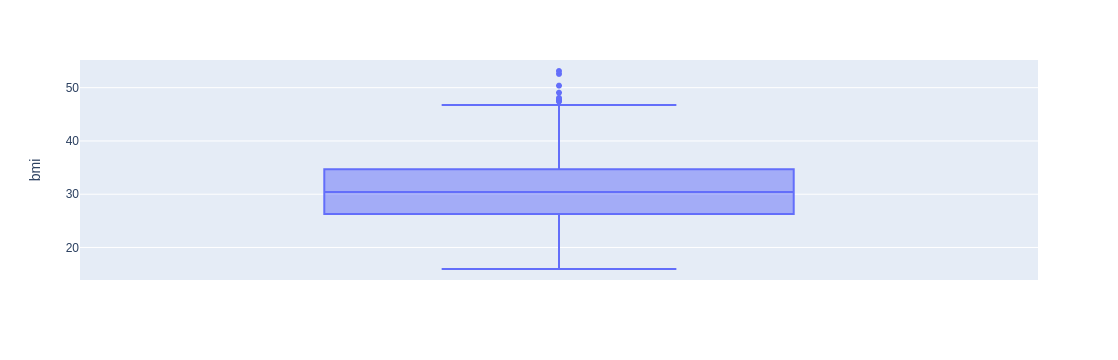

In [31]:
boxplot = px.box(df, y="bmi")
boxplot.show()

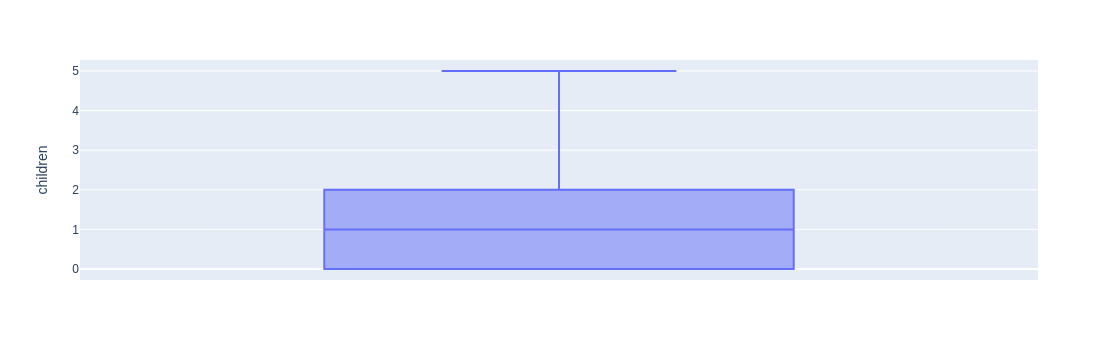

In [32]:
boxplot = px.box(df, y="children")
boxplot.show()

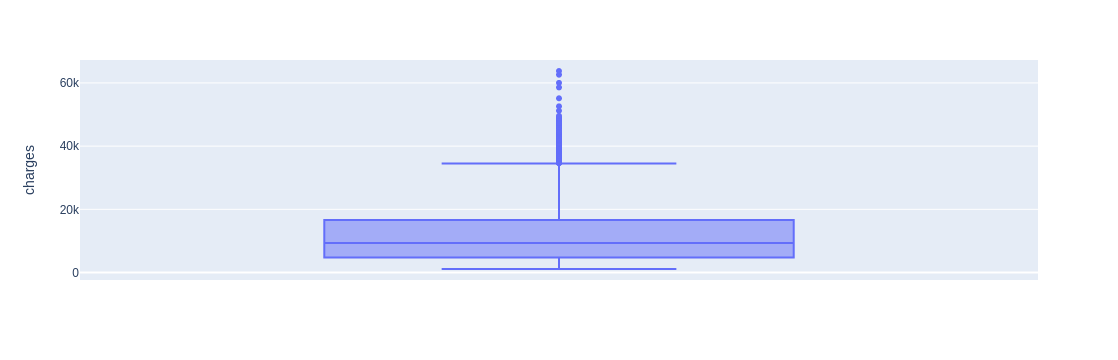

In [33]:
boxplot = px.box(df, y="charges")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [34]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

**Atributos previsores**

**- age**: idade do beneficiário principal.

**- sex**: gênero do contratante de seguros (feminino, masculino).

**- bmi**: índice de massa corporal, que fornece uma compreensão do corpo, pesos relativamente altos ou baixos em relação à altura, índice objetivo de peso corporal (kg/m^2) usando a relação entre altura e peso, idealmente 18,5 a 24,9.

**- children**: número de filhos cobertos pelo seguro saúde / número de dependentes.

**- smoker**: indica se o beneficiário é fumante.

**- region**: área residencial do beneficiário nos EUA (nordeste, sudeste, sudoeste, noroeste).

**Variável alvo**

**- charges**: custos médicos individuais cobrados pelo seguro de saúde.

In [35]:
import matplotlib.pyplot as plt

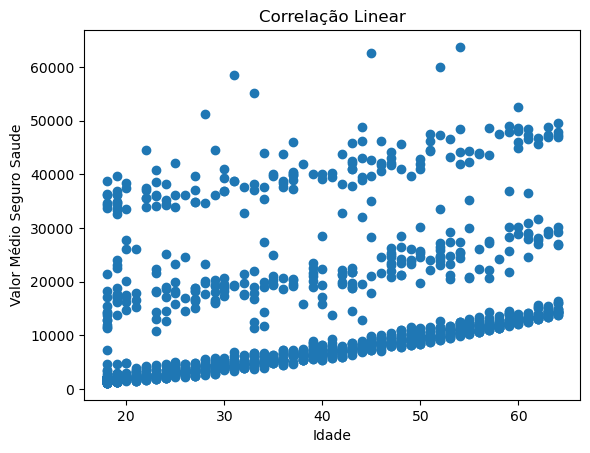

In [36]:
plt.scatter(df.age, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Idade')
plt.ylabel('Valor Médio Seguro Saude')
plt.grid(False)

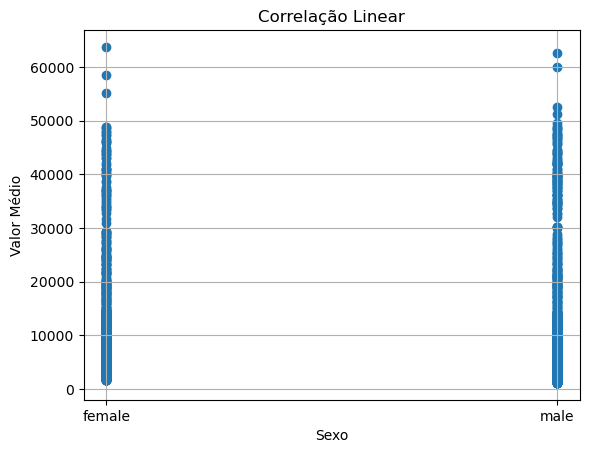

In [37]:
plt.scatter(df.sex, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Sexo')
plt.ylabel('Valor Médio')
plt.grid(True)


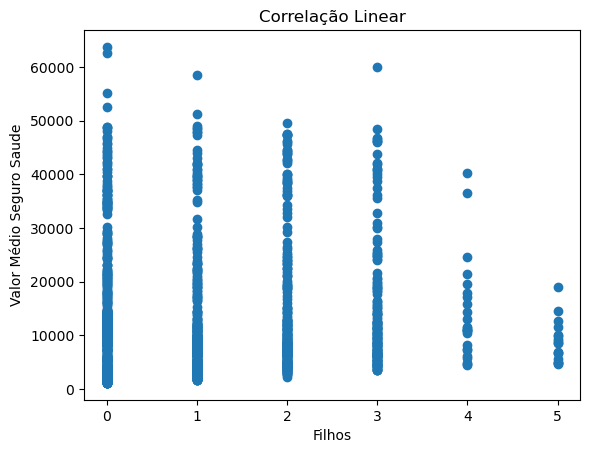

In [38]:
plt.scatter(df.children, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Filhos')
plt.ylabel('Valor Médio Seguro Saude')
plt.grid(False)

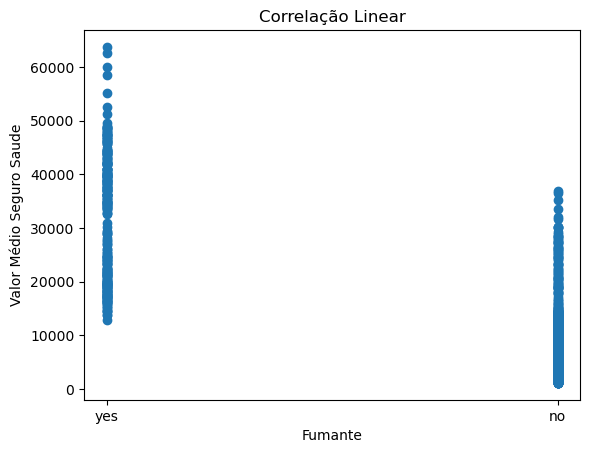

In [39]:
plt.scatter(df.smoker, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Fumante')
plt.ylabel('Valor Médio Seguro Saude')
plt.grid(False)

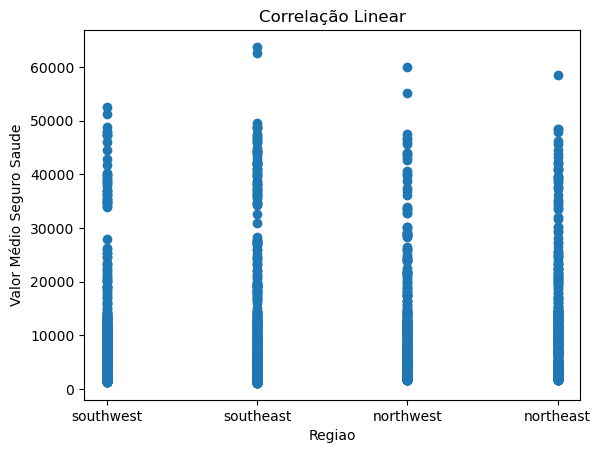

In [40]:
plt.scatter(df.region, df.charges)
plt.title('Correlação Linear')
plt.xlabel('Regiao')
plt.ylabel('Valor Médio Seguro Saude')
plt.grid(False)

In [41]:
import seaborn as sns

/home/mrzebodexxsz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/mrzebodexxsz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/mrzebodexxsz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/mrzebodexxsz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



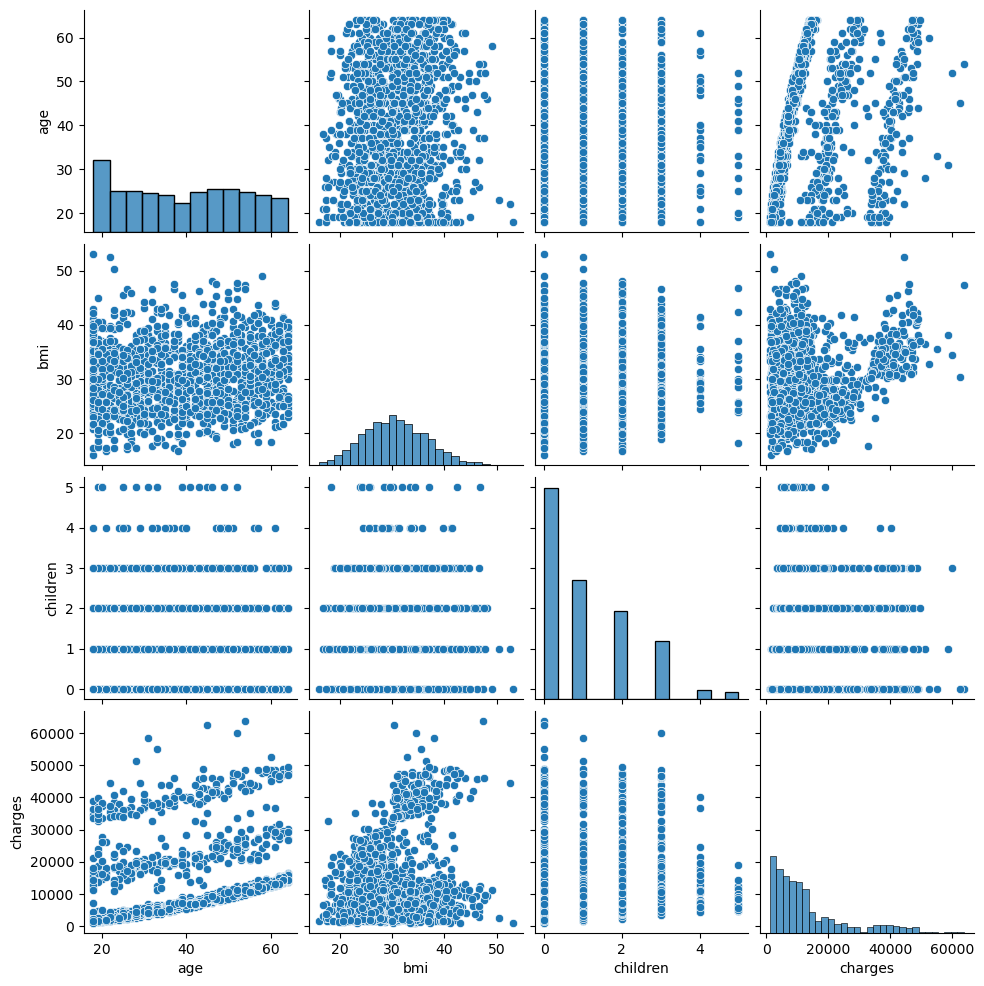

In [42]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

In [43]:
import scipy.stats as stats

In [44]:
df_ordinal.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [45]:
df_ordinal.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

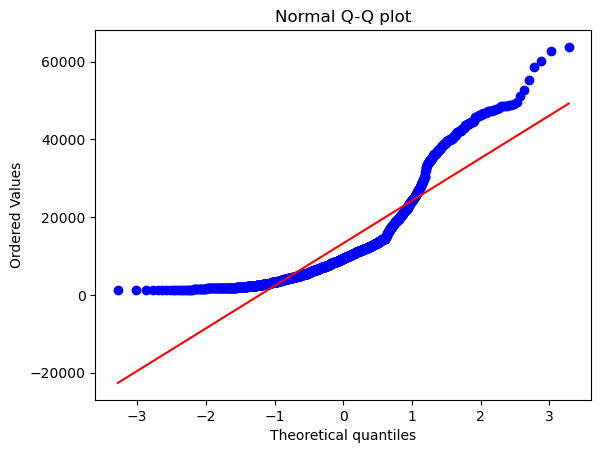

In [46]:
stats.probplot(df_ordinal['charges'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [47]:
import plotly.express as px

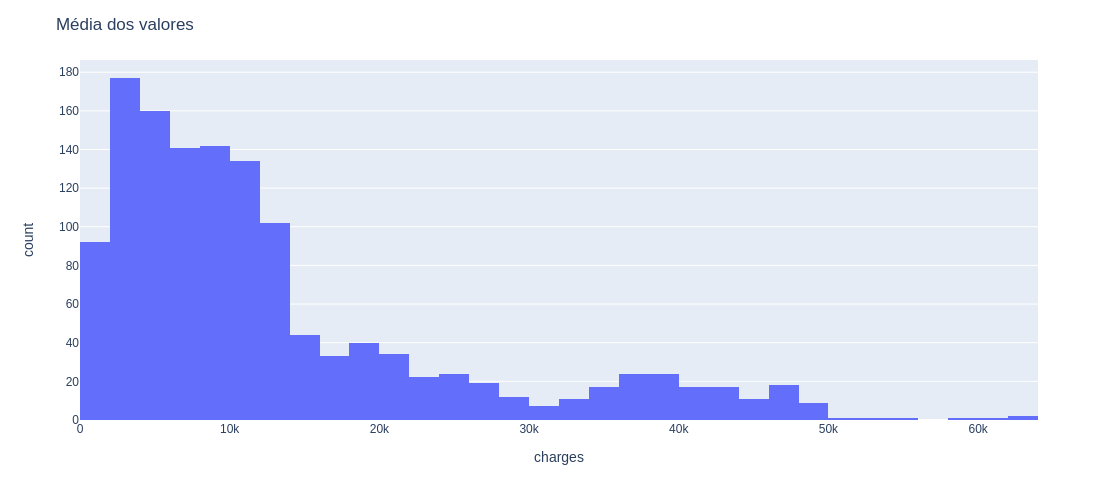

In [48]:
hist =  px.histogram (df_ordinal,  x = "charges", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

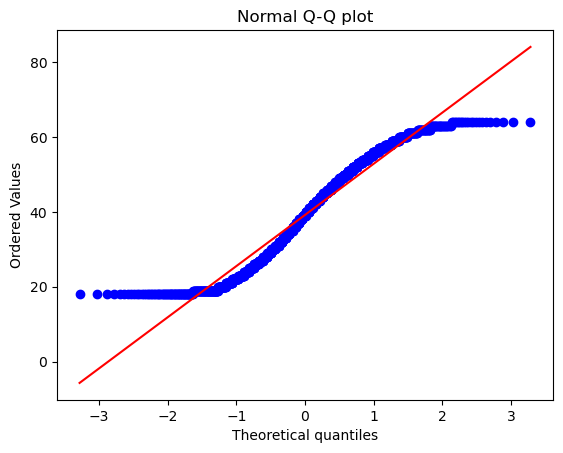

In [49]:
stats.probplot(df_ordinal['age'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

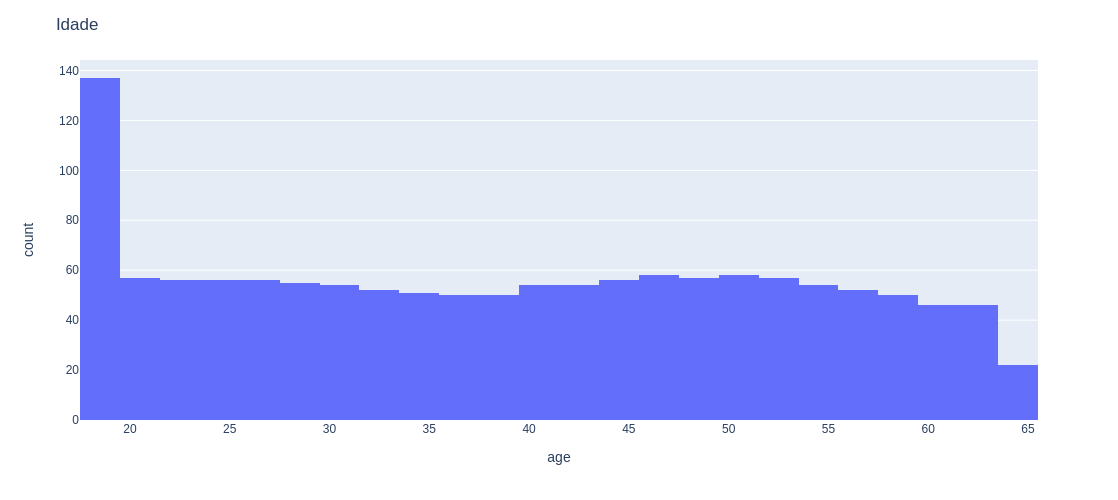

In [50]:
hist =  px.histogram (df_ordinal,  x = "age", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Idade') 
hist.show()

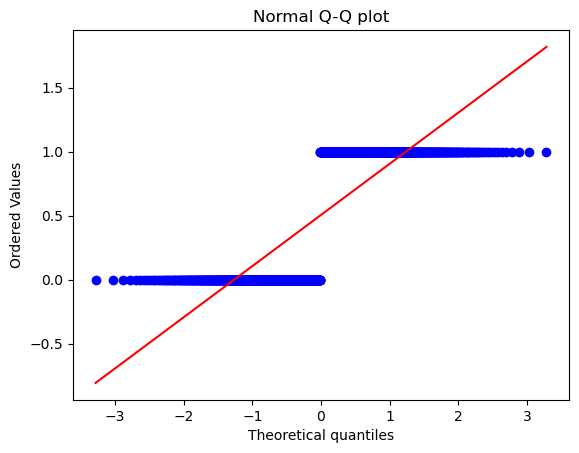

In [51]:
stats.probplot(df_ordinal['sex'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

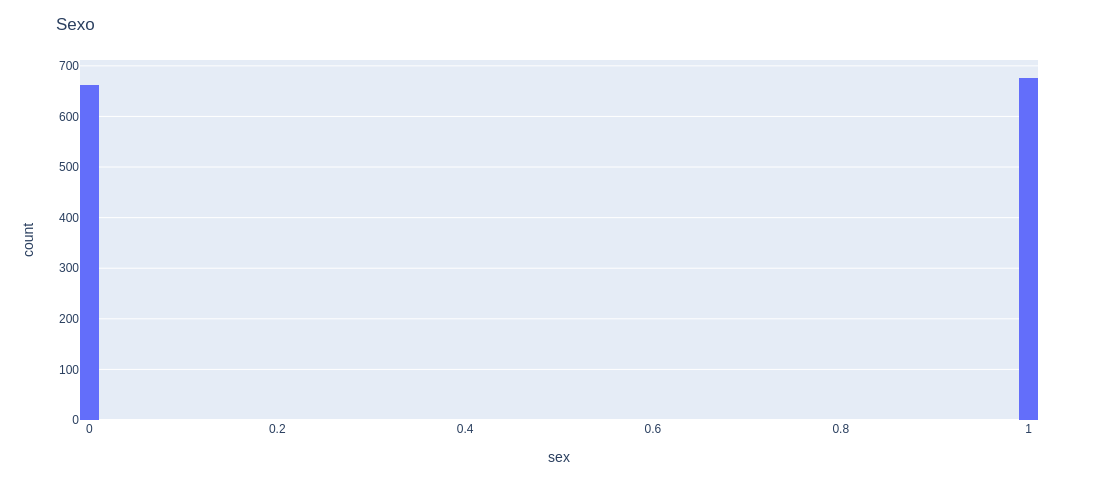

In [52]:
hist =  px.histogram (df_ordinal,  x = "sex", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Sexo') 
hist.show()

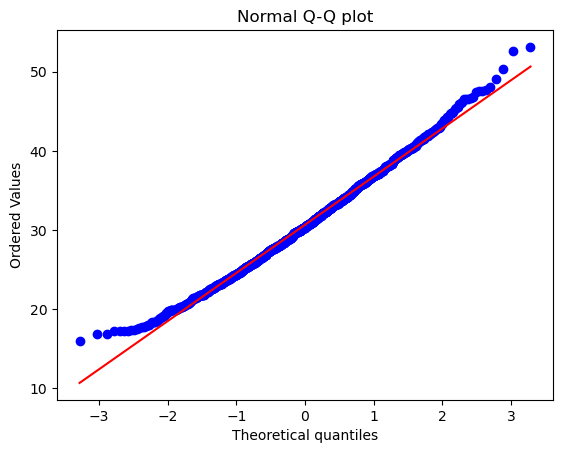

In [53]:
stats.probplot(df_ordinal['bmi'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

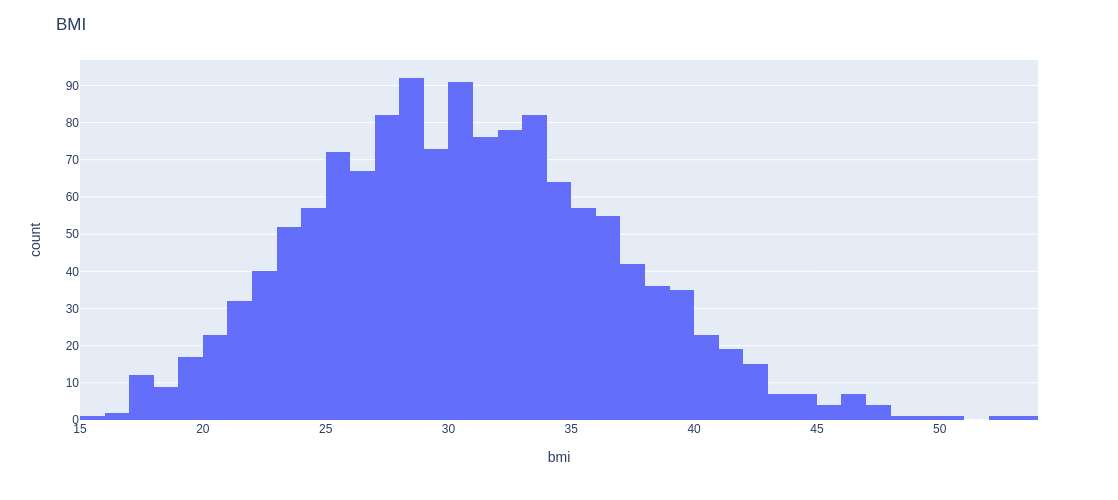

In [54]:
hist =  px.histogram (df_ordinal,  x = "bmi", nbins=60) 
hist.update_layout(width=800,height=500,title_text='BMI') 
hist.show()

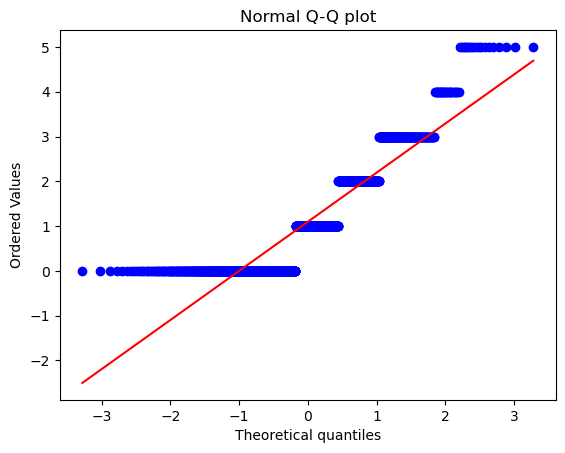

In [55]:
stats.probplot(df_ordinal['children'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

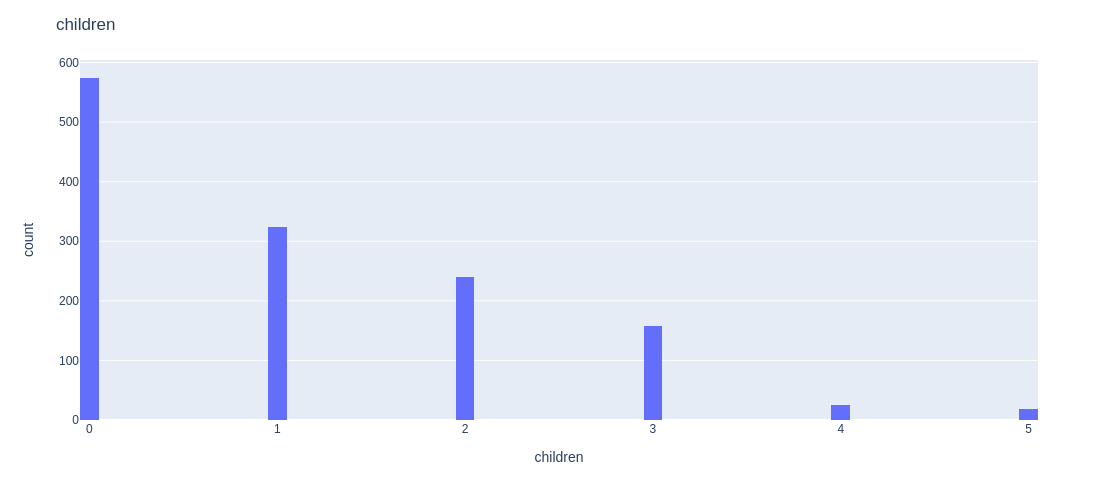

In [56]:
hist =  px.histogram (df_ordinal,  x = "children", nbins=60) 
hist.update_layout(width=800,height=500,title_text='children') 
hist.show()

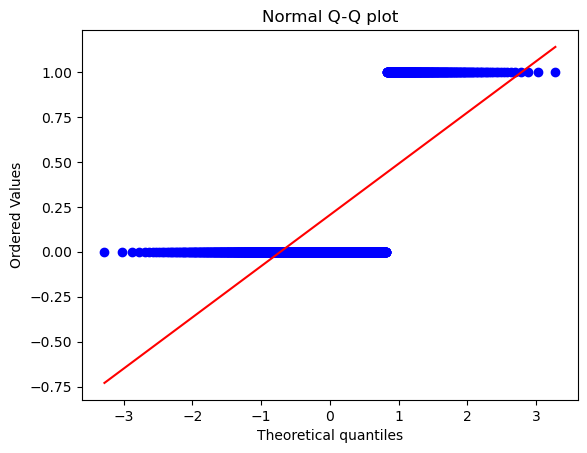

In [57]:
stats.probplot(df_ordinal['smoker'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

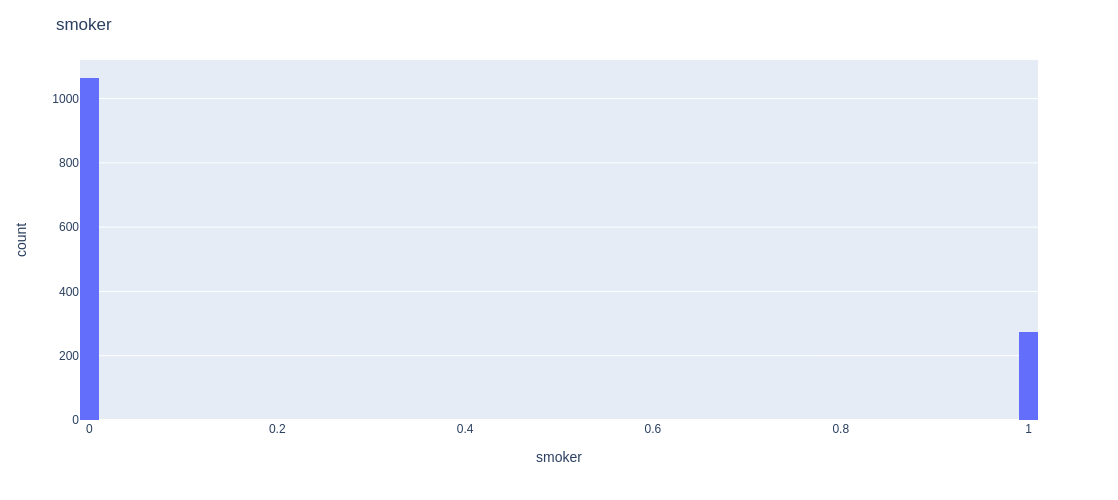

In [58]:
hist =  px.histogram (df_ordinal,  x = "smoker", nbins=60) 
hist.update_layout(width=800,height=500,title_text='smoker') 
hist.show()

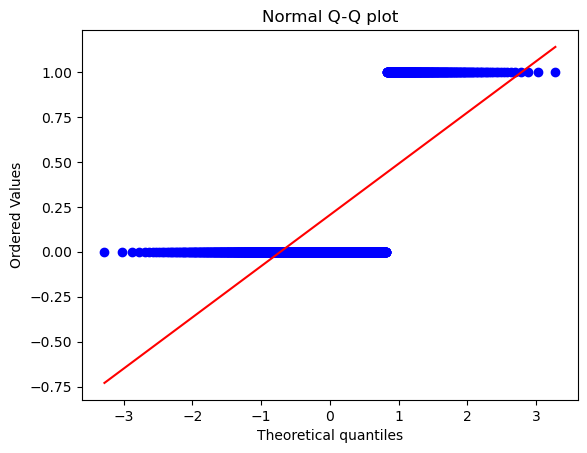

In [59]:
stats.probplot(df_ordinal['smoker'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

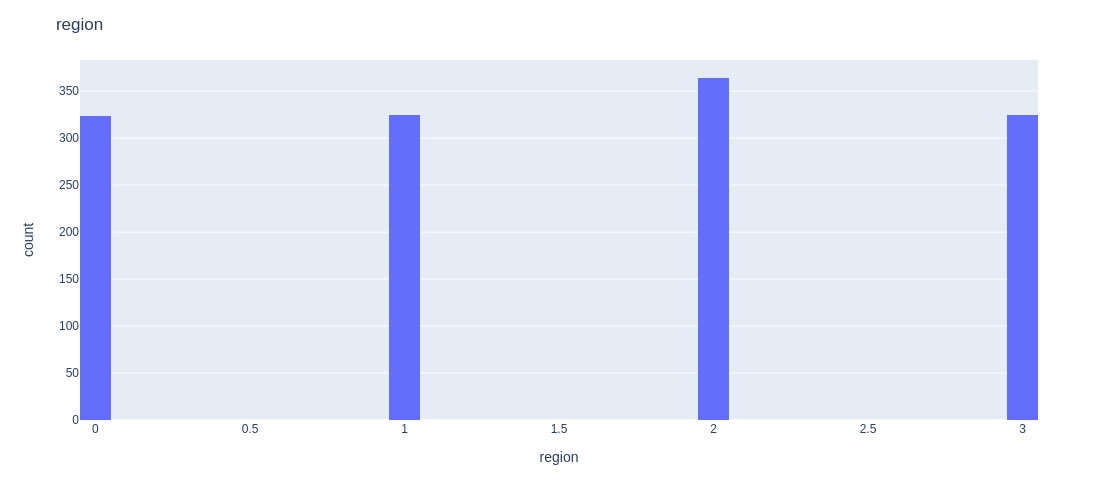

In [60]:
hist =  px.histogram (df_ordinal,  x = "region", nbins=60) 
hist.update_layout(width=800,height=500,title_text='region') 
hist.show()

### Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [61]:
stats.shapiro(df_ordinal.charges)

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

In [62]:
estatistica, p = stats.shapiro(df_ordinal.charges)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8146880865097046
p-valor: 1.1505194006561963e-36


In [63]:
estatistica, p = stats.shapiro(df_ordinal.age)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9446989893913269
p-valor: 5.687060076887153e-22


In [64]:
estatistica, p = stats.shapiro(df_ordinal.sex)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.6365700960159302
p-valor: 0.0


In [65]:
estatistica, p = stats.shapiro(df_ordinal.bmi)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9938861727714539
p-valor: 2.6033414542325772e-05


In [66]:
estatistica, p = stats.shapiro(df_ordinal.children)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8231810331344604
p-valor: 5.06690727121734e-36


In [67]:
estatistica, p = stats.shapiro(df_ordinal.smoker)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.4950329065322876
p-valor: 0.0


In [68]:
estatistica, p = stats.shapiro(df_ordinal.region)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.8594483137130737
p-valor: 5.87728477704126e-33


### Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [69]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [70]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.charges, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.18846450965981876
p-valor: 0.0009999999999998899


In [71]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.age, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.07894454646849702
p-valor: 0.0009999999999998899


In [72]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.sex, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.34395415731732243
p-valor: 0.0009999999999998899


In [73]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.bmi, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.026099881197044872
p-valor: 0.04431273291697496


In [74]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.children, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.2471317838278972
p-valor: 0.0009999999999998899


In [75]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.smoker, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.48923525156696346
p-valor: 0.0009999999999998899


In [76]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df_ordinal.region, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.18437438048019716
p-valor: 0.0009999999999998899


### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [77]:
# Pearson
# coef,p = stats.pearsonr(df_ordinal.charges, df_ordinal.bmi)
# print('Coeficiente de correlação: {}'.format(coef))
# print('p-valor: {}'.format(p))

In [78]:
# Spearman
coef,p = stats.spearmanr(df_ordinal.charges, df_ordinal.bmi)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.11939590358331147
p-valor: 1.1926059544526826e-05


In [79]:
# Kendall
# coef,p = stats.kendalltau(df_ordinal.charges,df_ordinal.bmi)
# print('Coeficiente de correlação: {}'.format(coef))
# print('p-valor: {}'.format(p))

In [80]:
correlacoes = df_ordinal.corr(method='spearman')
correlacoes

age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020809  0.107736  0.056992 -0.025210  0.004315  0.534392
sex      -0.020809  1.000000  0.044802  0.015589  0.076185  0.004614  0.009490
bmi       0.107736  0.044802  1.000000  0.015607  0.002203  0.152959  0.119396
children  0.056992  0.015589  0.015607  1.000000  0.016583  0.010604  0.133339
smoker   -0.025210  0.076185  0.002203  0.016583  1.000000 -0.002155  0.663460
region    0.004315  0.004614  0.152959  0.010604 -0.002155  1.000000 -0.043531
charges   0.534392  0.009490  0.119396  0.133339  0.663460 -0.043531  1.000000

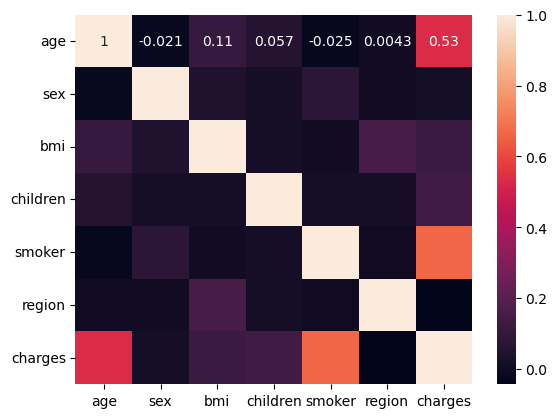

In [81]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### **TREINO COM BMI**

In [82]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [83]:
independente = df_ordinal.iloc[:,2:3].values
independente

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [84]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [85]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 10)

In [86]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [87]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

### **TESTE*

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

LinearRegression()

In [90]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

84.68050484714149

In [91]:
# Coeficiente Angular
reg_linear1.coef_

array([433.29493259])

**Equação: Valor = 84.68050484714149 + 433.29493259.smokers**

In [94]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

0.04731455322378331

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

In [95]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

array([ 7370.5347963 , 16575.88563912, 19019.66905891, 13525.4893137 ,
       12021.95589763, 13382.50198595, 14296.75429371, 14669.38793574,
       11263.6897656 , 15765.62411518, 13133.35739971, 12063.11891622,
       10856.39252897,  9305.1966703 , 12216.93861729, 13133.35739971,
       12268.9340092 , 16385.23586878, 12351.26004639, 13300.17594876,
       19769.26929229, 12063.11891622, 15891.27964563, 11445.67363729,
       15033.35567911,  9922.64194924, 14860.03770607, 10189.11833278,
       12606.90405662, 12968.70532533, 11220.36027234, 17576.7969334 ,
       15932.44266423, 14862.20418074, 13298.0094741 , 16549.88794316,
       10745.90232116, 14862.20418074, 15423.32111844, 11618.99161032,
       12996.86949595,  9097.21510266, 12474.74910218, 15356.16040389,
       12186.60797201,  9387.5227075 , 14080.10682742, 16909.52273721,
       16055.93172001, 12474.74910218, 15163.34415888, 11157.53250712,
       17331.98529648, 14955.36259124, 17286.48932856, 10210.78307941,
      

In [96]:
import matplotlib.pyplot as plt

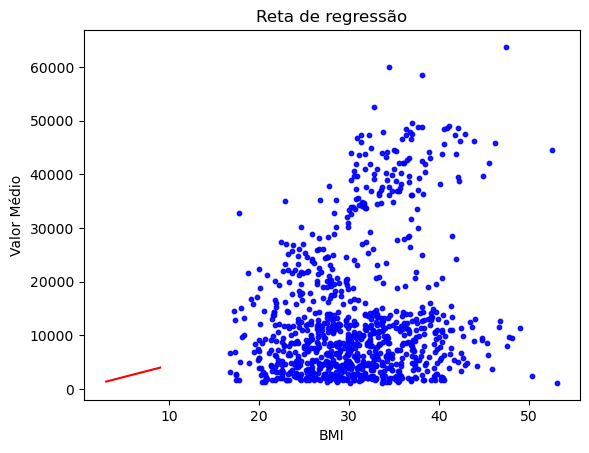

In [97]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('BMI')
plt.show()

In [98]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

array([12104.28193482, 11733.81476746, 16159.92250384, 10951.71741414,
       11363.34760009, 13791.96569725, 10618.08031604, 11714.31649549,
       10475.09298829,  8770.07742856, 10375.4351538 , 12557.07513937,
       11363.34760009, 14450.57399478, 15644.30153406, 10498.92420958,
       14812.37526349, 17329.81882182, 11870.30267122, 12227.77099061,
       13668.47664146, 15314.99738529, 11486.83665588, 11898.46684184,
       11571.32916774, 13668.47664146, 16159.92250384,  9387.5227075 ,
       14903.36719933, 12346.92709707,  8663.92017008, 15379.99162518,
       13859.1264118 ,  9675.66383767, 16957.1851798 , 18863.68288318,
       13092.19438112, 15986.6045308 , 11939.62986044, 11956.96165774,
       16051.59877069, 11075.20646992, 11281.0215629 , 15891.27964563,
       17910.43403149, 11428.34183998,  8399.6102612 , 13421.49852988,
       10787.06533975, 11198.69552571, 18608.03887295, 14431.07572281,
       14686.71973304, 13874.29173444, 13668.47664146, 13763.80152663,
      

In [99]:
y_teste

array([ 7281.5056  ,  5267.81815 , 12347.172   , 24513.09126 ,
        3736.4647  ,  7358.17565 ,  9788.8659  , 17085.2676  ,
        8211.1002  , 19798.05455 ,  3077.0955  ,  3385.39915 ,
        6837.3687  ,  8538.28845 , 26392.26029 , 13012.20865 ,
        3227.1211  , 15170.069   , 11073.176   , 20773.62775 ,
       39556.4945  ,  2134.9015  ,  2198.18985 ,  6555.07035 ,
        4340.4409  , 12622.1795  ,  7740.337   , 12475.3513  ,
        3987.926   , 21082.16    ,  1241.565   , 40103.89    ,
       17929.30337 ,  8302.53565 ,  3471.4096  ,  5846.9176  ,
       13352.0998  ,  9144.565   , 25656.57526 ,  7726.854   ,
       13887.9685  , 30284.64294 ,  5266.3656  , 12797.20962 ,
        1146.7966  ,  7046.7222  ,  8627.5411  , 39597.4072  ,
       12323.936   , 11454.0215  , 40904.1995  ,  3171.6149  ,
        7445.918   , 13607.36875 , 27346.04207 , 12557.6053  ,
       10797.3362  ,  5488.262   ,  6282.235   , 40941.2854  ,
        1708.0014  , 23306.547   , 28950.4692  ,  1664.

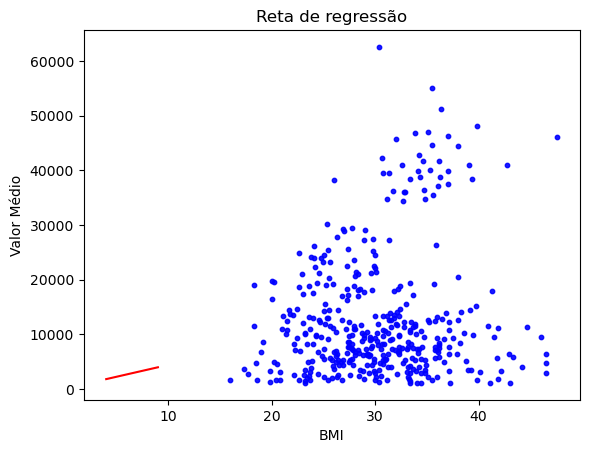

In [100]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('BMI')
plt.show()

In [101]:
# Fazendo previsões para valores distintos
valor_plano = reg_linear1.predict([[500]])
valor_plano

array([216732.14679849])

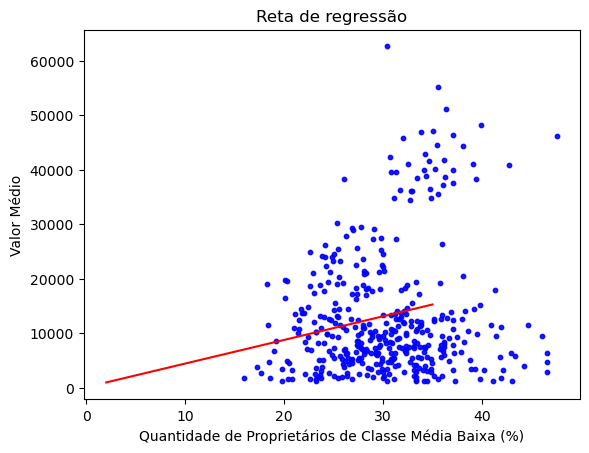

In [104]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [105]:
# Fazendo previsões para valores distintos
valor_plano = reg_linear1.predict([[25]])
valor_plano

array([10917.05381953])

### **Métricas de Desempenho**

In [106]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

8749.141569997752

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [108]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

8749.141569997752

In [109]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

128063038.6124162

In [110]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

11316.494095452716

### **Validação Cruzada**

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [112]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [113]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([ 0.03573484, -0.10233105,  0.07741748,  0.01476024, -0.04884882,
        0.05014097,  0.06525892, -0.00752895, -0.01379259,  0.02655395,
        0.02413374,  0.03299002,  0.07493534,  0.07843166,  0.02866093])

In [114]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 2.24%


### **Avaliando a Regressão Linear Simples com Statsmodels**

In [115]:
import statsmodels.formula.api as smf

In [116]:
import matplotlib.pyplot as plt

In [117]:
df.head(2)

age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523

In [118]:
independente = df_ordinal.iloc[:,2:3].values
independente

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [119]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [120]:
# Criação do modelo
regressao = smf.ols('dependente ~ independente', data = df).fit()

In [121]:
residuos = regressao.resid
residuos

0        4702.929232
1      -12768.477159
2       -9741.285225
3       11848.646237
4       -8701.135138
            ...     
1333    -2790.636673
1334   -11559.383552
1335   -14077.324894
1336    -9346.916404
1337    16498.534086
Length: 1338, dtype: float64

### Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [122]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.8619789481163025
p-valor: 1.0130498477462785e-32


In [123]:
import scipy.stats as stats

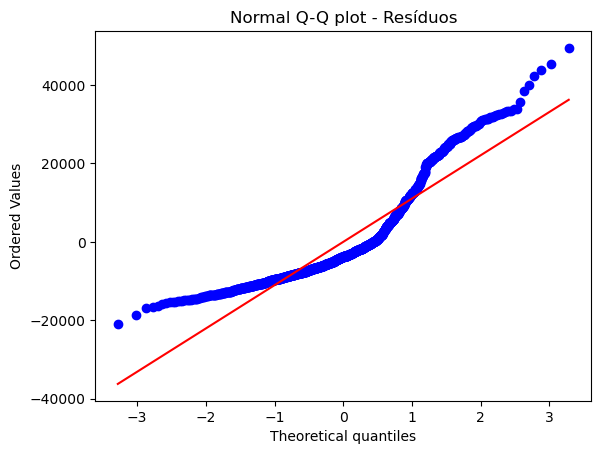

In [124]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

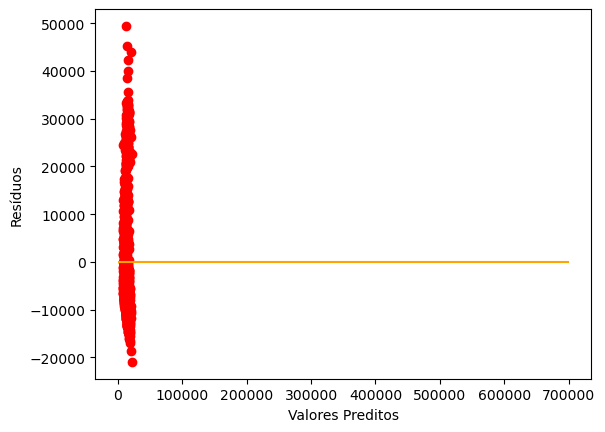

In [125]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=700000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [126]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [127]:
estatistica, p, f, fp = sms.het_breuschpagan (regressao.resid, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 119.1538556797601
p-valor: 9.691336296187555e-28
f-valor: 130.60676438119324
f_p-valor: 6.33933518694765e-29


### **Outliers nos resíduos**

(Entre -3 e 3)

In [128]:
outliers = regressao.outlier_test()

In [129]:
outliers.max()

student_resid    4.191238
unadj_p          0.998865
bonf(p)          1.000000
dtype: float64

In [130]:
outliers.min()

student_resid   -1.776008
unadj_p          0.000030
bonf(p)          0.039562
dtype: float64

**Modelo não consistente**

### **Modelo de Regressão Linear**

In [131]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             dependente   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.46e-13
Time:                        13:15:41   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1192.9372   1664.802      0.717   

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)

Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

**R^2 ajustado = 0.039**

In [132]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

              Coeficientes
Intercept      1192.937209
independente    393.873031


**Equação: Valor = 1192.937209 - 393.873031.BMI**

In [133]:
regressao.params

Intercept       1192.937209
independente     393.873031
dtype: float64

In [134]:
df_ordinal.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [135]:
regressao.predict()

array([12181.99476821, 14494.02945899, 14190.74722528, ...,
       15707.15839385, 11354.86140353, 12642.82621424])

/tmp/ipykernel_553315/1209204882.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



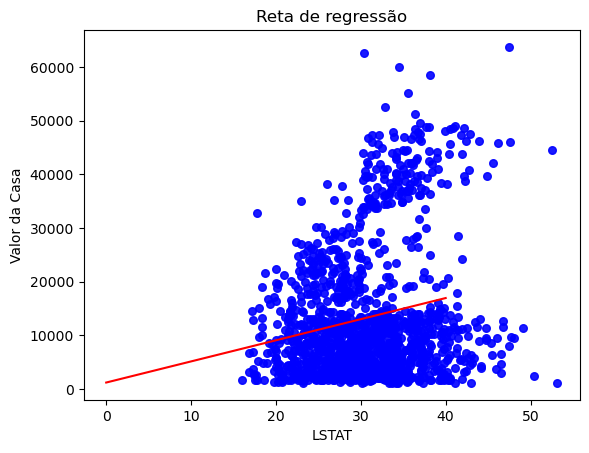

In [136]:
plt.scatter(y=df_ordinal.charges, x=df_ordinal.bmi, color='blue', s=30, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor da Casa')
plt.xlabel('LSTAT')
plt.show()

### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.047/0.013; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

## **REGRESSÃO LINEAR MÚLTIPLA**

#### **TREINO**

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [139]:
independente = df_ordinal.iloc[:, 0:5].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ]])

In [140]:
independente.shape

(1338, 5)

In [141]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [142]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [143]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [144]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [145]:
multipla.intercept_

-12057.244845998503

In [146]:
multipla.coef_

array([  257.8006705 ,   -41.74825718,   321.06004271,   469.58113407,
       23418.6671912 ])

In [147]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

Equação: Valor = -12057.24 + (257.80)*RM + (-41.75)*LSTAT + (321.06)*PTRATIO


In [148]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

0.7300454479213339

#### **TESTE**

In [149]:
previsoes = multipla.predict(x_teste)
previsoes

array([11472.23618644,  9958.50125569, 37657.06917237, 15949.13223617,
        6885.72312017,  3528.88810655,  1031.86224676, 14181.1024054 ,
        8847.14792524,  7275.30131109,  4216.86216451, 10190.14526672,
        9097.46039634,  4255.14691858, 27430.50340855, 11282.58288365,
       11177.22736522,  5504.64625133,  8030.81149341, 26327.41490839,
       33367.35431038, 14177.00561427, 11261.11883838, 32413.15484705,
        4414.81928993,  8606.98618122,   712.30206629, 10258.50678538,
        4198.66143865, 10231.92533963,  8874.73800132, 40207.90493832,
       15892.29406482, 14055.58336707, 24136.79051345,  4643.98226168,
       12953.8618379 , 30694.2595505 , 33135.3543329 ,  3790.06798605,
        3598.22643981,  4347.64393443, 29853.09596525, 39076.04912317,
       27832.89698787,  4787.97369821, 11176.63306955,  7646.91121556,
        3192.01904016, 10805.99433047,  5065.92896438,  3216.91828843,
       33153.3686017 , 37813.274525  , 16350.82043262,  6496.18828402,
      

In [150]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [152]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

0.789479034986701

In [157]:
# Fazendo previsões para valores distintos
valor_plano = multipla.predict([[21, 1, 33.770, 3, 1]])
valor_plano

array([28984.42921285])

**MÉTRICAS**

In [158]:
# Erro absoluto
abs(y_teste - previsoes).mean()

4008.3493827421157

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [160]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

4008.3493827421157

In [161]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

33571665.68502714

In [162]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

5794.106116134493

### **Validação Cruzada**

In [163]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [164]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [165]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.80586059, 0.649419  , 0.81146112, 0.70452488, 0.72059841,
       0.65374908, 0.79279079, 0.55305385, 0.75580185, 0.79924865,
       0.71984454, 0.76840099, 0.77632216, 0.75786505, 0.75799184])

In [166]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 73.51%


### **Avaliando a Regressão Linear Múltipla com Statsmodels**

In [167]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [170]:
df_ordinal.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [171]:
# Criação do modelo
modelo = smf.ols('charges ~ age + sex + children + smoker + region', data = df_ordinal).fit()

In [172]:
residuos = modelo.resid
residuos

0       -9159.472680
1        -823.862188
2       -1805.734937
3       15759.783710
4       -2084.692426
            ...     
1333    -1729.090822
1334       74.982295
1335     -370.408685
1336     -746.336847
1337    -8505.642201
Length: 1338, dtype: float64

### Teste de Normalidade dos resíduos

In [173]:
import scipy.stats as stats

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [174]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.7975179553031921
p-valor: 6.737708702662556e-38


In [175]:
import matplotlib.pyplot as plt

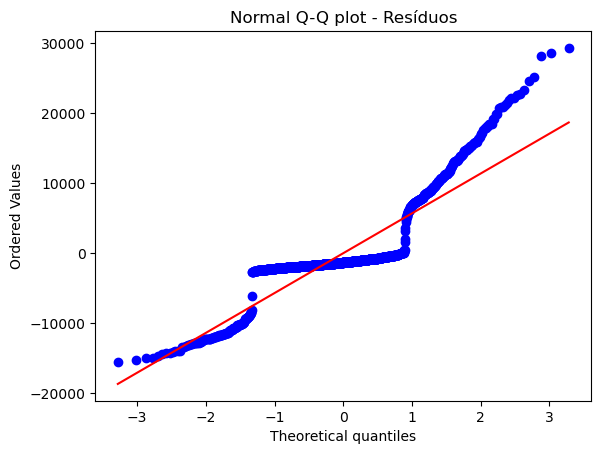

In [176]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

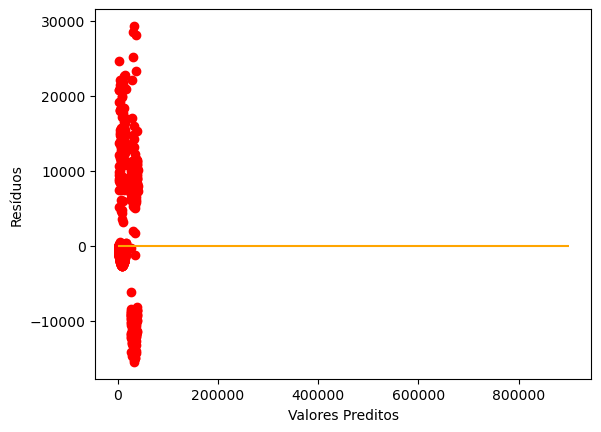

In [177]:
plt.scatter(y=residuos, x=modelo.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=900000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [178]:
from statsmodels.compat import lzip

In [179]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo.resid, modelo.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 257.2281201821211
p-valor: 1.5451656655669709e-53
f-valor: 63.40428770969161
f_p-valor: 1.9488745610259854e-59


### **Outliers nos resíduos**

(Entre -3 e 3)

In [180]:
outliers = modelo.outlier_test()

In [181]:
outliers.max()

student_resid    4.645524
unadj_p          0.996540
bonf(p)          1.000000
dtype: float64

In [182]:
outliers.min()

student_resid   -2.439035
unadj_p          0.000004
bonf(p)          0.004988
dtype: float64

### **Ausência de Multicolinearidade**

Somente entre as variáveis independentes.

Considerada multicolinearidade quando r > 0.9.

In [184]:
variaveis = df_ordinal[['age','sex','children', 'smoker','region']]

In [185]:
variaveis.head()

age  sex  children  smoker  region
0   19    0         0       1       3
1   18    1         1       0       2
2   28    1         3       0       2
3   33    1         0       0       1
4   32    1         0       0       1

In [186]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

age       sex  children    smoker    region
age       1.000000 -0.020856  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.017163  0.076185  0.004588
children  0.042469  0.017163  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.016569 -0.002181  1.000000

### **Análise do Modelo**

Intercept

p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

Adjusted R-squared (explicação do modelo através dos dados).

p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [187]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     698.1
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:34:31   Log-Likelihood:                -13617.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1332   BIC:                         2.728e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2785.5084    618.699     -4.502      0.0

In [188]:
df_ordinal_previsao = df_ordinal.copy()
# Criando uma coluna com previsão
df_ordinal_previsao['previsao'] = modelo.fittedvalues

In [189]:
df_ordinal_previsao.head()

age  sex     bmi  children  smoker  region      charges      previsao
0   19    0  27.900         0       1       3  16884.92400  26044.396680
1   18    1  33.770         1       0       2   1725.55230   2549.414488
2   28    1  33.000         3       0       2   4449.46200   6255.196937
3   33    1  22.705         0       0       1  21984.47061   6224.686900
4   32    1  28.880         0       0       1   3866.85520   5951.547626

In [190]:
import seaborn as sns

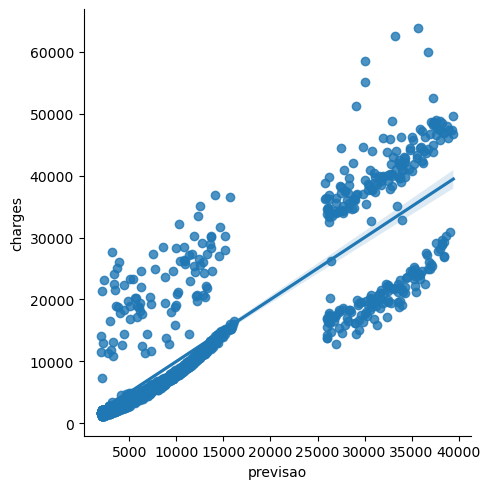

In [191]:
sns.lmplot(x='previsao', y='charges', data=df_ordinal_previsao);

### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.047/0.013; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

#### **TREINO**

Valor do plano de saudo em função do BMI

In [192]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [193]:
independente = df_ordinal.iloc[:,2:3].values
independente

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [194]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [195]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [196]:
x_treino.shape, y_treino.shape

((936, 1), (936,))

In [197]:
x_teste.shape, y_teste.shape

((402, 1), (402,))

In [198]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [199]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [200]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

array([[1.00000000e+00, 2.82150000e+01, 7.96086225e+02],
       [1.00000000e+00, 3.28000000e+01, 1.07584000e+03],
       [1.00000000e+00, 4.67500000e+01, 2.18556250e+03],
       ...,
       [1.00000000e+00, 2.50800000e+01, 6.29006400e+02],
       [1.00000000e+00, 3.55300000e+01, 1.26238090e+03],
       [1.00000000e+00, 1.85000000e+01, 3.42250000e+02]])

In [201]:
polinomial = LinearRegression()

In [202]:
polinomial.fit(x_poly, y_treino)

LinearRegression()

In [203]:
previsoes_treino = polinomial.predict(x_poly)

In [204]:
polinomial.coef_

array([  0.        , 857.96565752,  -8.08698444])

In [205]:
polinomial.intercept_

-5189.524975057899

In [206]:
numeros = np.linspace(3,9.84,342)
numeros

array([3.        , 3.02005865, 3.0401173 , 3.06017595, 3.0802346 ,
       3.10029326, 3.12035191, 3.14041056, 3.16046921, 3.18052786,
       3.20058651, 3.22064516, 3.24070381, 3.26076246, 3.28082111,
       3.30087977, 3.32093842, 3.34099707, 3.36105572, 3.38111437,
       3.40117302, 3.42123167, 3.44129032, 3.46134897, 3.48140762,
       3.50146628, 3.52152493, 3.54158358, 3.56164223, 3.58170088,
       3.60175953, 3.62181818, 3.64187683, 3.66193548, 3.68199413,
       3.70205279, 3.72211144, 3.74217009, 3.76222874, 3.78228739,
       3.80234604, 3.82240469, 3.84246334, 3.86252199, 3.88258065,
       3.9026393 , 3.92269795, 3.9427566 , 3.96281525, 3.9828739 ,
       4.00293255, 4.0229912 , 4.04304985, 4.0631085 , 4.08316716,
       4.10322581, 4.12328446, 4.14334311, 4.16340176, 4.18346041,
       4.20351906, 4.22357771, 4.24363636, 4.26369501, 4.28375367,
       4.30381232, 4.32387097, 4.34392962, 4.36398827, 4.38404692,
       4.40410557, 4.42416422, 4.44422287, 4.46428152, 4.48434

In [207]:
numeros.shape

(342,)

In [208]:
valor = 1640107 -568528.11*numeros + 60092.59*numeros**2

In [209]:
import matplotlib.pyplot as plt

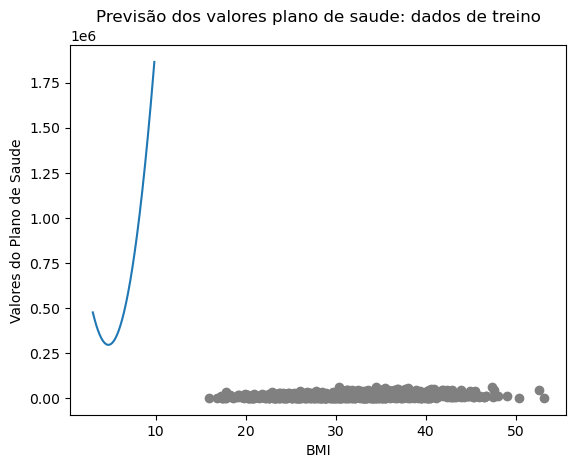

In [210]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("BMI")
plt.ylabel("Valores do Plano de Saude")
plt.title("Previsão dos valores plano de saude: dados de treino")
plt.plot(numeros, valor);

In [211]:
# Fazendo previsões para valores distintos
comodos = 6
valor = 1640107 -568528.11*comodos + 60092.59*comodos**2
valor

392271.5799999996

In [212]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

0.03384003188808982

#### **TESTE**

In [213]:
numeros2 = np.linspace(3,8.88,147)
numeros2

array([3.        , 3.04027397, 3.08054795, 3.12082192, 3.16109589,
       3.20136986, 3.24164384, 3.28191781, 3.32219178, 3.36246575,
       3.40273973, 3.4430137 , 3.48328767, 3.52356164, 3.56383562,
       3.60410959, 3.64438356, 3.68465753, 3.72493151, 3.76520548,
       3.80547945, 3.84575342, 3.8860274 , 3.92630137, 3.96657534,
       4.00684932, 4.04712329, 4.08739726, 4.12767123, 4.16794521,
       4.20821918, 4.24849315, 4.28876712, 4.3290411 , 4.36931507,
       4.40958904, 4.44986301, 4.49013699, 4.53041096, 4.57068493,
       4.6109589 , 4.65123288, 4.69150685, 4.73178082, 4.77205479,
       4.81232877, 4.85260274, 4.89287671, 4.93315068, 4.97342466,
       5.01369863, 5.0539726 , 5.09424658, 5.13452055, 5.17479452,
       5.21506849, 5.25534247, 5.29561644, 5.33589041, 5.37616438,
       5.41643836, 5.45671233, 5.4969863 , 5.53726027, 5.57753425,
       5.61780822, 5.65808219, 5.69835616, 5.73863014, 5.77890411,
       5.81917808, 5.85945205, 5.89972603, 5.94      , 5.98027

In [214]:
numeros2.shape

(147,)

In [215]:
valor2 = 1640107 -568528.11*numeros2 + 60092.59*numeros2**2

In [216]:
import matplotlib.pyplot as plt

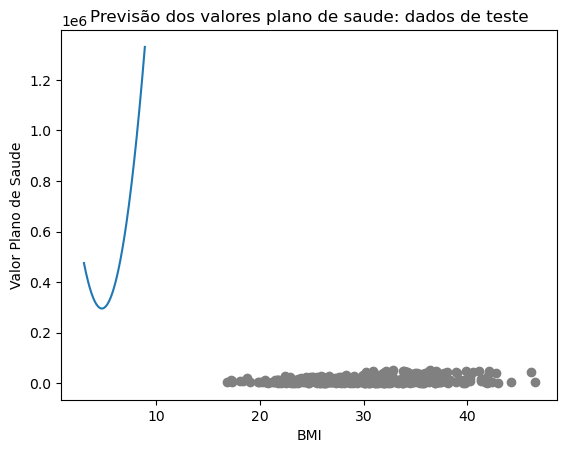

In [221]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("BMI")
plt.ylabel("Valor Plano de Saude")
plt.title("Previsão dos valores plano de saude: dados de teste")
plt.plot(numeros2, valor2);

In [222]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

array([[1.00000000e+00, 3.02000000e+01, 9.12040000e+02],
       [1.00000000e+00, 2.93700000e+01, 8.62596900e+02],
       [1.00000000e+00, 4.05650000e+01, 1.64551922e+03],
       ...,
       [1.00000000e+00, 3.82800000e+01, 1.46535840e+03],
       [1.00000000e+00, 3.91600000e+01, 1.53350560e+03],
       [1.00000000e+00, 2.50000000e+01, 6.25000000e+02]])

In [223]:
polinomial_teste = LinearRegression()

In [224]:
polinomial_teste.fit(x_poly_teste, y_teste)

LinearRegression()

In [225]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

0.05117384719329443

In [226]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [228]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

9588.821945838197

In [229]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

150014232.71924508

In [230]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

12248.029748463427

### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

### **TREINO**

In [231]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [232]:
independente = df_ordinal.iloc[:, 0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [233]:
independente.shape

(1338, 6)

In [234]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [235]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [236]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [237]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

SVR()

In [239]:
SVR.score(x_treino, y_treino)

-0.09422606874822681

In [240]:
SVR.score(x_teste, y_teste)

-0.08848234153324563

**Padronização de escala**

In [241]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [242]:
x_treino_scaler

array([[-1.5330973 , -0.97676557, -0.40713453, -0.89833872, -0.50466988,
        -1.40820029],
       [-0.03364163, -0.97676557,  0.32855417, -0.89833872, -0.50466988,
         1.31322188],
       [ 0.89459283, -0.97676557,  2.56690911,  3.25603402, -0.50466988,
         0.40608116],
       ...,
       [ 0.03776102,  1.02378711, -0.91016269, -0.89833872, -0.50466988,
         0.40608116],
       [-1.46169465,  1.02378711,  0.76659782, -0.89833872, -0.50466988,
        -0.50105957],
       [-0.46205754, -0.97676557, -1.96596021, -0.06746417, -0.50466988,
         1.31322188]])

In [243]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [244]:
y_treino_scaler

array([[-9.29114569e-01],
       [-6.38651947e-01],
       [-5.39325234e-02],
       [-4.89603748e-01],
       [-6.71349717e-01],
       [-9.67549383e-01],
       [ 1.99311860e+00],
       [-7.49986519e-03],
       [-5.43346082e-01],
       [-2.11871148e-02],
       [-3.93810261e-01],
       [-6.34346126e-02],
       [ 2.99749417e+00],
       [-8.24494558e-01],
       [-4.46162315e-01],
       [ 2.82436277e-01],
       [ 1.14345861e-01],
       [-9.85403479e-01],
       [-5.30554176e-01],
       [-9.27713303e-01],
       [-1.15928290e-01],
       [ 5.03782109e-01],
       [-1.43008068e-01],
       [ 2.33634863e+00],
       [-7.02715735e-01],
       [ 1.74120307e+00],
       [ 2.98421635e-01],
       [-1.89528398e-01],
       [-4.38466738e-01],
       [ 2.63340976e+00],
       [-4.17078733e-01],
       [-7.99784555e-01],
       [-3.51547052e-01],
       [ 4.66138790e-01],
       [ 1.93407799e+00],
       [ 4.94776882e-01],
       [ 1.04631189e+00],
       [ 2.18064123e+00],
       [-7.8

In [245]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

array([[ 0.89459283,  1.02378711, -0.08863026, -0.06746417, -0.50466988,
         1.31322188],
       [ 0.53757957, -0.97676557, -0.22180837, -0.06746417, -0.50466988,
         0.40608116],
       [ 0.60898222,  1.02378711,  1.57449152,  0.76341038,  1.98149332,
        -0.50105957],
       ...,
       [ 1.10880078,  1.02378711,  1.20785059, -0.89833872, -0.50466988,
         0.40608116],
       [ 1.75142463,  1.02378711,  1.34905148, -0.06746417, -0.50466988,
         0.40608116],
       [ 1.60861933, -0.97676557, -0.92299913, -0.89833872, -0.50466988,
         1.31322188]])

In [246]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

In [247]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

SVR()

In [248]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.8420229069432991

### **TESTE**

In [249]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.877917969449256

In [250]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-2.05665635e-01, -3.01639114e-01,  3.05461110e+00,  4.81890296e-02,
       -1.67926566e-01, -6.77847665e-01, -8.31644843e-01, -5.80607713e-02,
       -4.15897935e-01, -6.32058389e-01, -4.08214600e-01, -1.60495633e-01,
       -4.04433414e-01, -6.78967821e-01,  6.23568654e-01, -1.25514334e-01,
        3.26524022e-02, -7.07351192e-01, -4.80064138e-01,  1.00067407e+00,
        9.11553783e-01,  5.93619741e-02, -1.57576352e-01,  1.18577305e+00,
       -8.78041117e-01, -6.09796828e-01, -6.73348083e-01, -3.98291773e-01,
       -7.14303243e-01, -3.12013326e-01, -3.81421319e-01,  3.04304802e+00,
        6.91257155e-02, -1.52163877e-01, -6.29203522e-04, -6.76270955e-01,
       -3.24841864e-01,  2.23481088e+00,  2.22302133e+00, -8.60768151e-01,
       -5.36217853e-01, -7.87401356e-01,  7.40612945e-01,  3.06279942e+00,
        2.00897357e+00, -7.10066698e-01, -1.27254654e-01, -4.36845865e-01,
       -6.34058305e-01, -4.56142172e-03, -7.88141841e-01, -6.63679643e-01,
        1.42569667e+00,  

In [251]:
y_teste_scaler

array([[-2.95473865e-01],
       [-3.94586401e-01],
       [ 2.73452549e+00],
       [-2.38210314e-02],
       [-3.02234780e-01],
       [-7.35451572e-01],
       [-9.29336992e-01],
       [-1.51272887e-01],
       [-4.79692315e-01],
       [-6.57575321e-01],
       [-5.45730852e-01],
       [-2.30674202e-01],
       [-4.96486983e-01],
       [-7.62000979e-01],
       [ 4.27650930e-01],
       [-2.13097920e-01],
       [-5.97377347e-02],
       [-8.20495396e-01],
       [-5.70591936e-01],
       [ 1.70484300e+00],
       [ 9.04049301e-01],
       [-4.96505360e-02],
       [ 8.26414524e-01],
       [ 8.28086660e-01],
       [-9.73430644e-01],
       [-7.21364344e-01],
       [-8.00107923e-01],
       [-4.67437893e-01],
       [-7.98086955e-01],
       [-4.05891011e-01],
       [-4.35686449e-01],
       [ 3.00977314e+00],
       [-2.13545175e-02],
       [ 6.23001101e-01],
       [ 1.12767486e-01],
       [-7.66007730e-01],
       [-4.11474645e-01],
       [ 3.19710311e+00],
       [ 2.2

### **Revertendo a transformação**

In [252]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [253]:
y_teste_inverse

array([[ 9724.53    ],
       [ 8547.6913  ],
       [45702.02235 ],
       [12950.0712  ],
       [ 9644.2525  ],
       [ 4500.33925 ],
       [ 2198.18985 ],
       [11436.73815 ],
       [ 7537.1639  ],
       [ 5425.02335 ],
       [ 6753.038   ],
       [10493.9458  ],
       [ 7337.748   ],
       [ 4185.0979  ],
       [18310.742   ],
       [10702.6424  ],
       [12523.6048  ],
       [ 3490.5491  ],
       [ 6457.8434  ],
       [33475.81715 ],
       [23967.38305 ],
       [12643.3778  ],
       [23045.56616 ],
       [23065.4207  ],
       [ 1674.6323  ],
       [ 4667.60765 ],
       [ 3732.6251  ],
       [ 7682.67    ],
       [ 3756.6216  ],
       [ 8413.46305 ],
       [ 8059.6791  ],
       [48970.2476  ],
       [12979.358   ],
       [20630.28351 ],
       [14571.8908  ],
       [ 4137.5227  ],
       [ 8347.1643  ],
       [51194.55914 ],
       [40003.33225 ],
       [ 1880.487   ],
       [ 5458.04645 ],
       [ 2867.1196  ],
       [20149.3229  ],
       [474

In [254]:
previsoes_inverse

array([[10790.89158259],
       [ 9651.32530153],
       [49502.64287358],
       [13805.10155454],
       [11238.9963192 ],
       [ 5184.31435867],
       [ 3358.1632138 ],
       [12543.51666488],
       [ 8294.64320444],
       [ 5728.00533856],
       [ 8385.87329851],
       [11327.22945547],
       [ 8430.77020235],
       [ 5171.01389531],
       [20637.02249598],
       [11742.58909359],
       [13620.62333169],
       [ 4833.99648711],
       [ 7532.74895953],
       [25114.68258215],
       [24056.48949223],
       [13937.76644245],
       [11361.89230294],
       [27312.50395897],
       [ 2807.26488269],
       [ 5992.33382712],
       [ 5237.74132638],
       [ 8503.69458986],
       [ 4751.4494925 ],
       [ 9528.14437107],
       [ 8704.01035724],
       [49365.34554629],
       [14053.69878736],
       [11426.15875117],
       [13225.44545406],
       [ 5203.03583956],
       [ 9375.82136442],
       [39768.52985907],
       [39628.54348045],
       [ 3012.35997328],


### **MÉTRICAS**

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [256]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

2449.2570769616564

In [257]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

19468356.11142072

In [259]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

4412.296013576233

### **Validação Cruzada**

**Padronização de escala**

In [260]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [261]:
independente_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [262]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [263]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [264]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [265]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

array([0.90259518, 0.80365337, 0.88424688, 0.84109714, 0.83132115,
       0.74995028, 0.90977541, 0.67727644, 0.8308581 , 0.88170723,
       0.83334345, 0.85321284, 0.85748204, 0.834374  , 0.83387109])

In [266]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação médio: 83.50%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

### **TREINO**

In [269]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [270]:
independente = df_ordinal.iloc[:, 0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [271]:
independente.shape

(1338, 6)

In [272]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [273]:
dependente.shape

(1338,)

In [274]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [275]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [276]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [277]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [278]:
arvore.score(x_treino, y_treino)

0.8753111250530279

### **TESTE**

In [281]:
arvore.score(x_teste, y_teste)

0.8239135295086505

In [282]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

array([11839.80721163,  9258.80334932, 41896.67127447, 15240.29968833,
       11564.04733484,  7125.37182402,  3064.76344858,  9258.80334932,
        7125.37182402,  7125.37182402,  7125.37182402, 11564.04733484,
        9258.80334932,  5217.35429405, 19099.57786744,  9258.80334932,
       15240.29968833,  4528.30711673,  7125.37182402, 33705.2506    ,
       24582.06236882, 14800.61554821, 11839.80721163, 26745.56683125,
        3064.76344858,  7125.37182402,  7125.37182402,  7589.23995085,
        5217.35429405,  9258.80334932,  7125.37182402, 46847.68208429,
       15240.29968833, 11839.80721163, 19099.57786744,  7125.37182402,
        9258.80334932, 41405.620994  , 41896.67127447,  3064.76344858,
        7125.37182402,  5217.35429405, 19099.57786744, 46847.68208429,
       37517.02964286,  3064.76344858,  9258.80334932,  7125.37182402,
        7125.37182402, 11839.80721163,  4528.30711673,  3064.76344858,
       26745.56683125, 46847.68208429, 11839.80721163,  7125.37182402,
      

In [283]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

### **MÉTRICAS**

In [284]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [285]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2842.5201034107986

In [286]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

28080415.262292475

In [288]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

5299.095702314922

### **Validação Cruzada**

In [289]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [290]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [291]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.91127325, 0.81901877, 0.88672059, 0.7692046 , 0.87075135,
       0.76383865, 0.9013885 , 0.63250802, 0.85136365, 0.8305891 ,
       0.80959701, 0.86454659, 0.86038145, 0.8424176 , 0.84221843])

In [292]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 83.04%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0.87/0.82; RMSE = 5299.095702314922; R^2 Validação Cruzada: 83.04%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

### **TREINO**

In [293]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [294]:
independente = df_ordinal.iloc[:, 0:5].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ]])

In [295]:
independente.shape

(1338, 5)

In [296]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [297]:
dependente.shape

(1338,)

In [298]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [299]:
x_treino.shape, x_teste.shape

((936, 5), (402, 5))

In [300]:
y_treino.shape, y_teste.shape

((936,), (402,))

In [301]:
from sklearn.ensemble import RandomForestRegressor

In [302]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [303]:
random.score(x_treino, y_treino)

0.8807298461192583

### **TESTE**

In [307]:
random.score(x_teste, y_teste)

0.8857585283923489

In [308]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

array([12086.88971155, 10949.94442776, 44829.15661609, 14041.60079461,
       11376.45260545,  7367.6290963 ,  2594.0890186 , 12284.49177387,
        7335.46767019,  6286.38519487,  7315.47912147, 12998.38063898,
        9332.67947364,  6173.9656047 , 21718.84991568, 12439.11210417,
       14284.56710661,  4929.28439355,  7156.42551337, 34966.03001214,
       24149.53902814, 14673.72235786, 11997.58709346, 27062.54628296,
        3316.82691242,  6262.02330198,  5565.77561802,  7326.9637567 ,
        4925.0231605 ,  9761.29660533,  7158.19635206, 46122.80673875,
       14041.60079461, 11971.36129309, 17403.30843041,  5047.52986657,
        9806.83986575, 37925.34148231, 40468.88328077,  3372.30584277,
        7204.74931945,  5239.8127045 , 19677.3322701 , 46056.41344418,
       37963.72958055,  4049.49307851, 12439.11210417,  7077.28312497,
        5741.40291316, 12678.0802554 ,  3923.33935616,  3706.08587225,
       25932.37143314, 46520.9450977 , 11735.45579266,  5783.76075368,
      

In [309]:
y_teste

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

### **MÉTRICAS**

In [310]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [311]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2494.7661402115923

In [312]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

18218026.370605417

In [313]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4268.258001879152

### **Validação Cruzada**

In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [315]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [316]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9240807 , 0.83745051, 0.90030154, 0.82313304, 0.88146637,
       0.77350697, 0.92491156, 0.66489598, 0.85214296, 0.86945126,
       0.83248568, 0.86520398, 0.8718813 , 0.84988856, 0.85978833])

In [317]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 84.87%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0.87/0.82; RMSE = 5299.095702314922; R^2 Validação Cruzada: 83.04%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0.88/0.88; RMSE = 4268.258001879152; R^2 Validação Cruzada: 84.87%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

### **TREINO**

In [327]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [328]:
independente = df_ordinal.iloc[:, 0:3].values
independente

array([[19.  ,  0.  , 27.9 ],
       [18.  ,  1.  , 33.77],
       [28.  ,  1.  , 33.  ],
       ...,
       [18.  ,  0.  , 36.85],
       [21.  ,  0.  , 25.8 ],
       [61.  ,  0.  , 29.07]])

In [329]:
independente.shape

(1338, 3)

In [330]:
dependente = df_ordinal.iloc[:, 3].values

In [331]:
dependente.shape

(1338,)

In [332]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [333]:
x_treino.shape, x_teste.shape

((936, 3), (402, 3))

In [334]:
from xgboost import XGBRegressor

In [335]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=180, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)

In [336]:
xgboost.score(x_treino, y_treino)

0.2921897425568426

### **TESTE**

In [337]:
xgboost.score(x_teste, y_teste)

0.02409895894680658

In [338]:
previsoes_teste = xgboost.predict(x_teste)

In [340]:
# Fazendo previsões para valores distintos
valor_plano = xgboost.predict([[6,20,12]])
valor_plano

array([0.4232426], dtype=float32)

**MÉTRICAS**

In [341]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [343]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

0.9599548888888525

In [344]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

1.1932595643616026

### **Validação Cruzada**

In [345]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [346]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [347]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([ 0.03598631,  0.0357563 ,  0.14152569,  0.05642892,  0.09927095,
        0.00935398,  0.01544226,  0.09049751, -0.07205214,  0.03642524,
        0.05850317,  0.08118269,  0.04630533, -0.01276586, -0.03353077])

In [348]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de determinação Médio: 3.92%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0.87/0.82; RMSE = 5299.095702314922; R^2 Validação Cruzada: 83.04%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0.88/0.88; RMSE = 4268.258001879152; R^2 Validação Cruzada: 84.87%.

**REGRESSÃO COM XGBOOST:** R^2 = 0.29/0.02; RMSE = 1.1932595643616026; R^2 Validação Cruzada: 3.92%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

### **TREINO**

In [349]:
# Instalação do Algoritmo
!pip install lightgbm

In [350]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [351]:
independente = df_ordinal.iloc[:, 0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [352]:
independente.shape

(1338, 6)

In [353]:
dependente = df_ordinal.iloc[:, 6].values

In [354]:
dependente.shape

(1338,)

In [355]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [356]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [357]:
import lightgbm as lgb

In [358]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 6
[LightGBM] [Info] Start training from score 13232.916456
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(max_depth=3, n_estimators=50, num_leaves=50, random_state=10)

In [359]:
lgbm.score(x_treino, y_treino)

0.868797198271347

### **TESTE**

In [365]:
lgbm.score(x_teste, y_teste)

0.8949154439253929

In [366]:
previsoes_teste = lgbm.predict(x_teste)

### **MÉTRICAS**

In [367]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [368]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2451.001348159619

In [369]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4093.626503297183

### **Validação Cruzada**

In [370]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [371]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [372]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1248, number of used features: 6
[LightGBM] [Info] Start training from score 13326.503987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

array([0.92172887, 0.84014807, 0.89527349, 0.86130486, 0.88270555,
       0.77738243, 0.92864083, 0.68966973, 0.85015692, 0.88663815,
       0.85961924, 0.8776062 , 0.88014931, 0.86216192, 0.84994585])

In [373]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 85.75%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0.87/0.82; RMSE = 5299.095702314922; R^2 Validação Cruzada: 83.04%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0.88/0.88; RMSE = 4268.258001879152; R^2 Validação Cruzada: 84.87%.

**REGRESSÃO COM XGBOOST:** R^2 = 0.29/0.02; RMSE = 1.1932595643616026; R^2 Validação Cruzada: 85.75%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0.86/0.89; RMSE = 4093.626503297183; R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [375]:
### **TREINO**

In [376]:
#Instalação
!pip install catboost

In [377]:
df_ordinal.head(2)

age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       2   1725.5523

In [378]:
independente = df_ordinal.iloc[:, 0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [379]:
independente.shape

(1338, 6)

In [380]:
dependente = df_ordinal.iloc[:, 6].values

In [381]:
dependente.shape

(1338,)

In [382]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [383]:
x_treino.shape, x_teste.shape

((936, 6), (402, 6))

In [384]:
from catboost.core import CatBoostRegressor

In [385]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

0:	learn: 11238.1129165	total: 48.3ms	remaining: 4.78s
1:	learn: 10652.8325919	total: 48.8ms	remaining: 2.39s
2:	learn: 10028.6925189	total: 49.1ms	remaining: 1.59s
3:	learn: 9517.1422456	total: 49.3ms	remaining: 1.18s
4:	learn: 9035.3627772	total: 49.6ms	remaining: 942ms
5:	learn: 8569.4806314	total: 49.8ms	remaining: 781ms
6:	learn: 8139.6128214	total: 50.1ms	remaining: 665ms
7:	learn: 7763.0811989	total: 50.3ms	remaining: 578ms
8:	learn: 7448.0468916	total: 50.4ms	remaining: 510ms
9:	learn: 7148.3231650	total: 50.7ms	remaining: 456ms
10:	learn: 6868.9376380	total: 50.9ms	remaining: 412ms
11:	learn: 6616.6543206	total: 51.1ms	remaining: 375ms
12:	learn: 6385.7514744	total: 51.4ms	remaining: 344ms
13:	learn: 6184.4359269	total: 51.6ms	remaining: 317ms
14:	learn: 6017.6248566	total: 51.8ms	remaining: 294ms
15:	learn: 5854.7448151	total: 52.1ms	remaining: 273ms
16:	learn: 5701.7414348	total: 52.3ms	remaining: 255ms
17:	learn: 5565.2884672	total: 52.5ms	remaining: 239ms
18:	learn: 5464.0

In [386]:
catboost.score(x_treino, y_treino)

0.8792550211504451

### **TESTE**

In [387]:
catboost.score(x_teste, y_teste)

0.8940875219233144

In [388]:
previsoes_teste = catboost.predict(x_teste)

**MÉTRICAS**

In [389]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [390]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

2420.5314957460346

In [391]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

4109.720942755243

### **Validação Cruzada**

In [392]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [393]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [394]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

0:	learn: 11395.6312695	total: 481us	remaining: 47.7ms
1:	learn: 10735.9794002	total: 886us	remaining: 43.4ms
2:	learn: 10089.7514011	total: 1.22ms	remaining: 39.5ms
3:	learn: 9541.2188176	total: 1.54ms	remaining: 36.9ms
4:	learn: 9057.1222224	total: 1.88ms	remaining: 35.8ms
5:	learn: 8603.4920796	total: 2.16ms	remaining: 33.9ms
6:	learn: 8152.1868584	total: 2.46ms	remaining: 32.6ms
7:	learn: 7753.9856503	total: 2.74ms	remaining: 31.5ms
8:	learn: 7387.7834343	total: 3.02ms	remaining: 30.5ms
9:	learn: 7077.8438297	total: 3.32ms	remaining: 29.9ms
10:	learn: 6793.8411526	total: 3.71ms	remaining: 30ms
11:	learn: 6539.1713615	total: 4ms	remaining: 29.4ms
12:	learn: 6325.1335243	total: 4.24ms	remaining: 28.4ms
13:	learn: 6110.0559042	total: 4.56ms	remaining: 28ms
14:	learn: 5946.5818741	total: 4.87ms	remaining: 27.6ms
15:	learn: 5772.4770975	total: 5.16ms	remaining: 27.1ms
16:	learn: 5624.8081226	total: 5.45ms	remaining: 26.6ms
17:	learn: 5503.3829082	total: 5.76ms	remaining: 26.2ms
18:	lear

array([0.91801074, 0.83106814, 0.88361733, 0.85542458, 0.87235479,
       0.77456761, 0.92470165, 0.68830986, 0.85353905, 0.8847556 ,
       0.85732189, 0.87851381, 0.88048695, 0.85899612, 0.85266467])

In [395]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 85.43%


### **RESULTADOS**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0.04/0.01; RMSE = 11316.494095452716; R^2 Validação Cruzada: 2.24%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0.73/0.78; RMSE = 5794.106116134493; R^2 Validação Cruzada: 73.51%

**REGRESSÃO POLINOMIAL:** R^2 = 0.03/0.05; RMSE = 12248.029748463427.

**REGRESSÃO SVR:** R^2 = 0.84/0.87; RMSE = 4412.296013576233. R^2 Validação Cruzada: 83.50%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0.87/0.82; RMSE = 5299.095702314922; R^2 Validação Cruzada: 83.04%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0.88/0.88; RMSE = 4268.258001879152; R^2 Validação Cruzada: 84.87%.

**REGRESSÃO COM XGBOOST:** R^2 = 0.29/0.02; RMSE = 1.1932595643616026; R^2 Validação Cruzada: 85.75%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0.86/0.89; RMSE = 4093.626503297183; R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0.87/0.89; RMSE = 4109.720942755243; R^2 Validação Cruzada: 85.43%.

# **Salvando dados para Deploy**

In [399]:
independente = df_ordinal.iloc[:, 0:6].values
independente

array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ,  3.  ],
       [18.  ,  1.  , 33.77,  1.  ,  0.  ,  2.  ],
       [28.  ,  1.  , 33.  ,  3.  ,  0.  ,  2.  ],
       ...,
       [18.  ,  0.  , 36.85,  0.  ,  0.  ,  2.  ],
       [21.  ,  0.  , 25.8 ,  0.  ,  0.  ,  3.  ],
       [61.  ,  0.  , 29.07,  0.  ,  1.  ,  1.  ]])

In [400]:
dependente = df_ordinal.iloc[:, 6].values
dependente

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [403]:
np.savetxt('../output/independente.csv', independente, delimiter=',')

In [404]:
np.savetxt('../output/dependente.csv', dependente, delimiter=',')

# **CONCLUSAO DESAFIO 2**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/mirichoi0218/insurance/code

**Melhor Metodo:** **REGRESSÃO COM LIGHT GBM:** R^2 = 0.86/0.89; RMSE = 4093.626503297183; R^2 Validação Cruzada: 82,38%.